In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

In [2]:
Al = pd.read_excel('Airlines+Data.xlsx')

In [3]:
Al

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
Al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
Al.shape

(96, 2)

In [6]:
Al.size

192

In [7]:
Al.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [8]:
Al[Al.duplicated()].shape

(0, 2)

In [9]:
Al[Al.duplicated()].shape

(0, 2)

In [10]:
Al.set_index('Month',inplace=True)

In [11]:
Al.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Month')

In [12]:
Al.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
             6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
             4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
             9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
             2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='Month')

In [13]:
Al[Al.duplicated()].shape

(16, 1)

In [14]:
Al[Al.duplicated()]

,Passengers
Month,
1995-08-01,148
1995-12-01,118
1996-04-01,135
1996-08-01,170
1997-06-01,178
1997-08-01,199
1998-11-01,172
1999-02-01,196
1999-11-01,180


In [15]:
Al = Al.drop_duplicates()

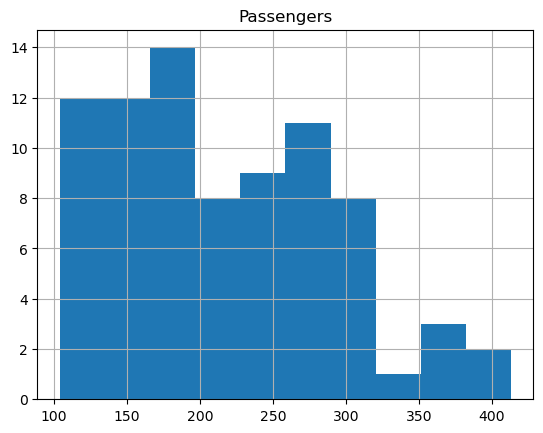

In [18]:
Al.hist()
plt.show()

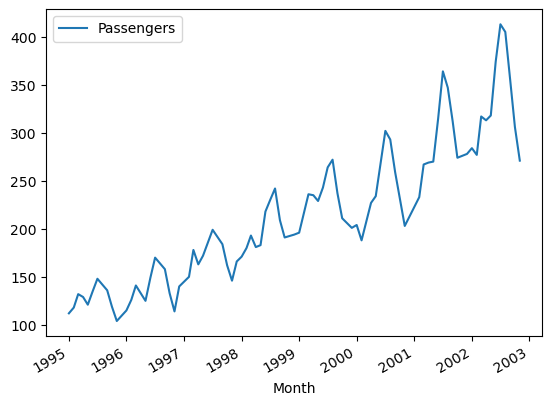

In [20]:
Al.plot()
plt.show()

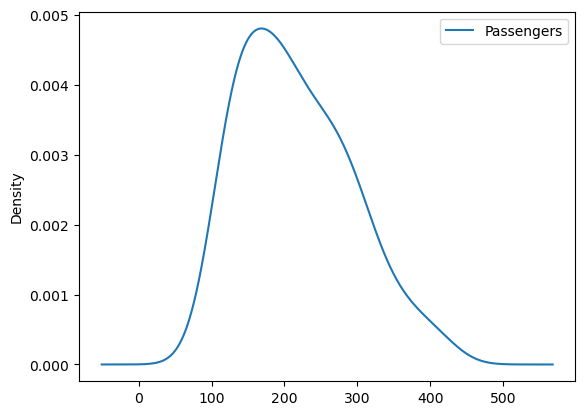

In [25]:
Al.plot(kind='kde')
plt.show()

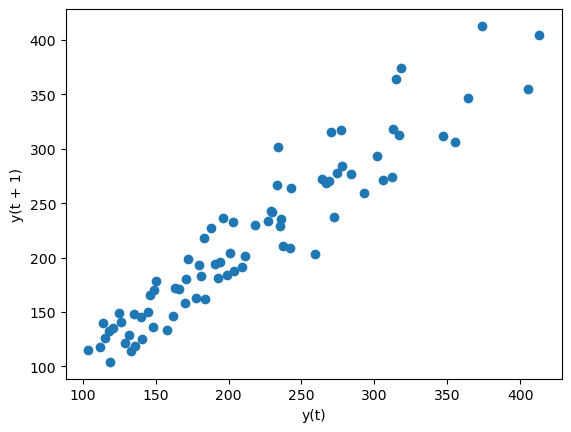

In [28]:
from pandas.plotting import lag_plot
lag_plot(Al, lag=1)
plt.show()

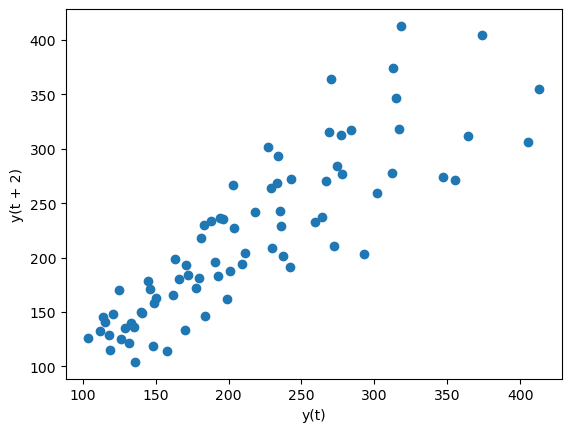

In [29]:
lag_plot(Al, lag=2)
plt.show()

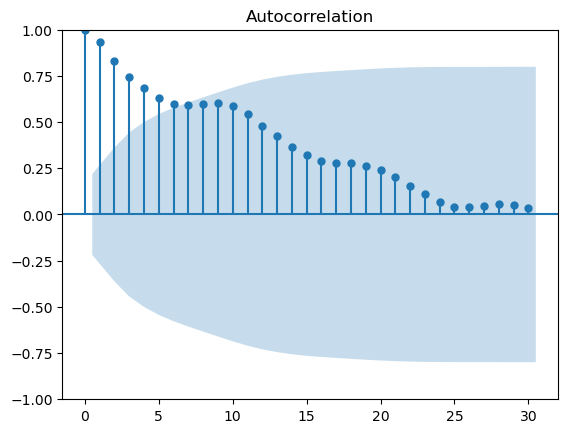

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(Al, lags=30)
plt.show()

In [40]:
# upsampling
upsampled = Al.resample('M').mean()
print(upsampled)

            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
...                ...
2002-07-31       413.0
2002-08-31       405.0
2002-09-30       355.0
2002-10-31       306.0
2002-11-30       271.0

[95 rows x 1 columns]


In [42]:
# Interpolating
interpolated = upsampled.interpolate(methode='linear')
print(interpolated)

            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
...                ...
2002-07-31       413.0
2002-08-31       405.0
2002-09-30       355.0
2002-10-31       306.0
2002-11-30       271.0

[95 rows x 1 columns]


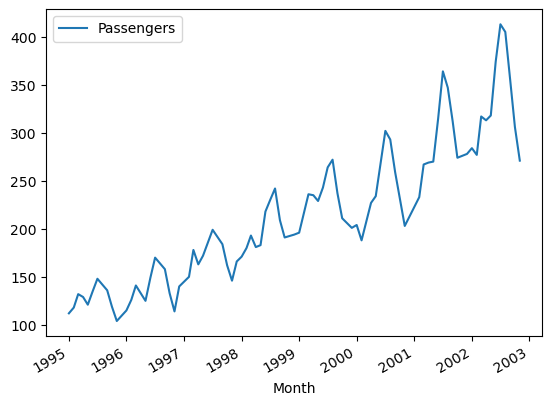

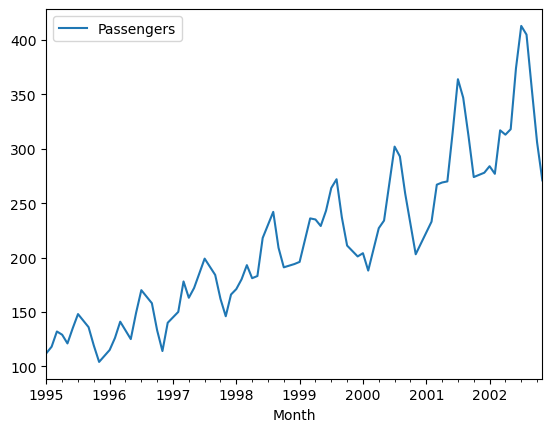

In [45]:
Al.plot()
interpolated.plot()
plt.show()

In [47]:
upsampled1 = Al.resample('D').mean()
interpolated1 = upsampled1.interpolate(methode='linear')
print(upsampled1)
print(interpolated1)

            Passengers
Month                 
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
...                ...
2002-10-28         NaN
2002-10-29         NaN
2002-10-30         NaN
2002-10-31         NaN
2002-11-01       271.0

[2862 rows x 1 columns]
            Passengers
Month                 
1995-01-01  112.000000
1995-01-02  112.193548
1995-01-03  112.387097
1995-01-04  112.580645
1995-01-05  112.774194
...                ...
2002-10-28  275.516129
2002-10-29  274.387097
2002-10-30  273.258065
2002-10-31  272.129032
2002-11-01  271.000000

[2862 rows x 1 columns]


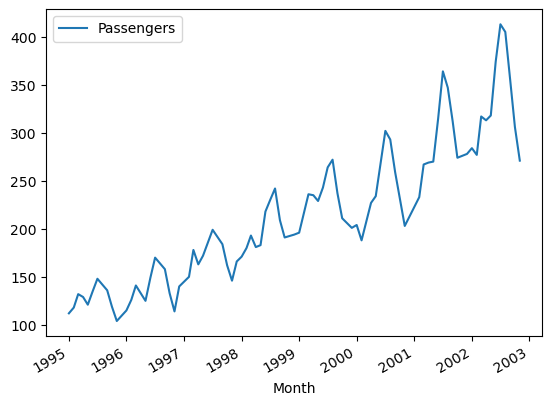

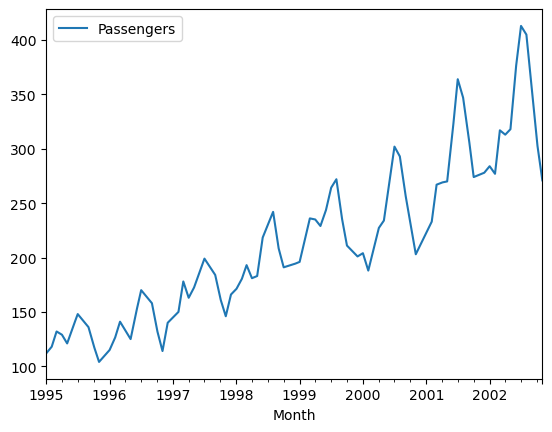

In [51]:
Al.plot()
interpolated1.plot()
plt.show()

In [54]:
interpolated

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-07-31,413.0
2002-08-31,405.0
2002-09-30,355.0


In [60]:
# Transformation
# Square Root Transform
from numpy import sqrt
df = DataFrame(Al.values)
df.columns = ['Passengers']
df['Passengers'] = sqrt(df['Passengers'])

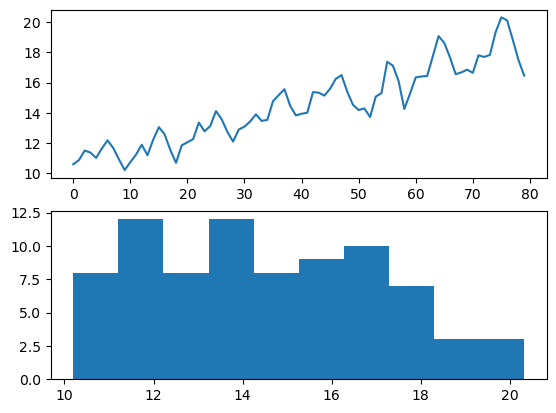

In [80]:
plt.subplot(211)
plt.plot(df['Passengers'])
plt.subplot(212)
plt.hist(df['Passengers'])
plt.show()

In [89]:
# Log Transform
from numpy import log
from pandas import DataFrame
df = pd.DataFrame(Al.values)
df.columns = ['Passengers']
df['Passengers'] = log(df['Passengers'])

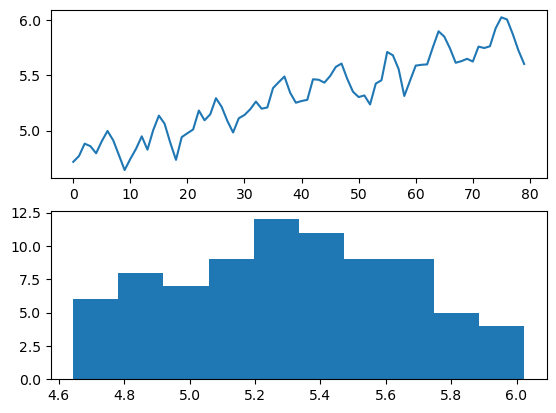

In [93]:
plt.subplot(211)
plt.plot(df['Passengers'])
plt.subplot(212)
plt.hist(df['Passengers'])
plt.show()

In [111]:
Train = interpolated.head(81)
Test = interpolated.tail(14)

In [97]:
Train

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2001-05-31,270.0
2001-06-30,315.0
2001-07-31,364.0


In [112]:
Test

,Passengers
Month,
2001-10-31,274.0
2001-11-30,276.0
2001-12-31,278.0
2002-01-31,284.0
2002-02-28,277.0
2002-03-31,317.0
2002-04-30,313.0
2002-05-31,318.0
2002-06-30,374.0


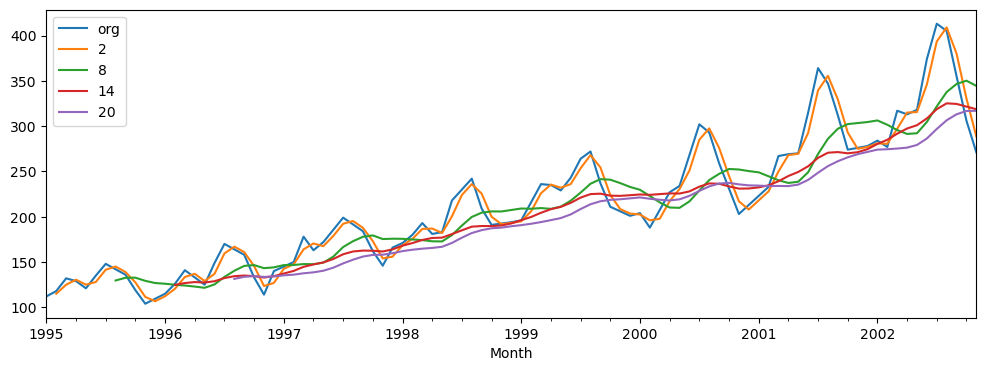

In [151]:
# Moving Average
plt.figure(figsize=(12,4))
interpolated['Passengers'].plot(label='org')
for i in range(2,24,6):
    interpolated['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend()
plt.show()

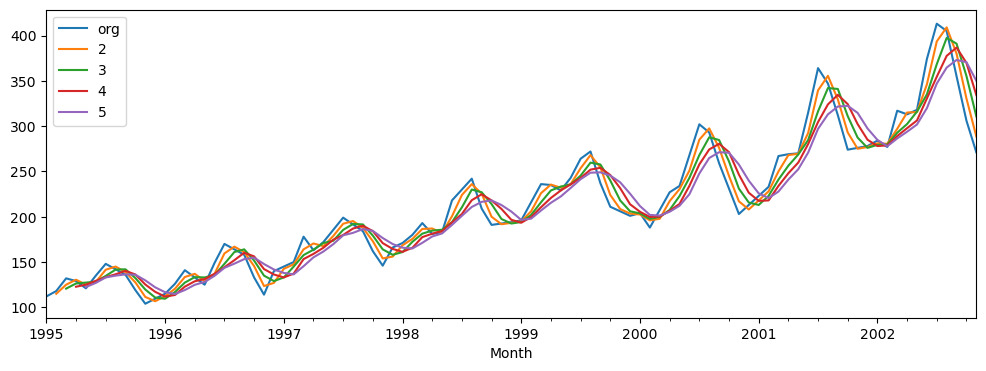

In [150]:
# Moving Average
plt.figure(figsize=(12,4))
interpolated['Passengers'].plot(label='org')
for i in range(2,6):
    interpolated['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend()
plt.show()

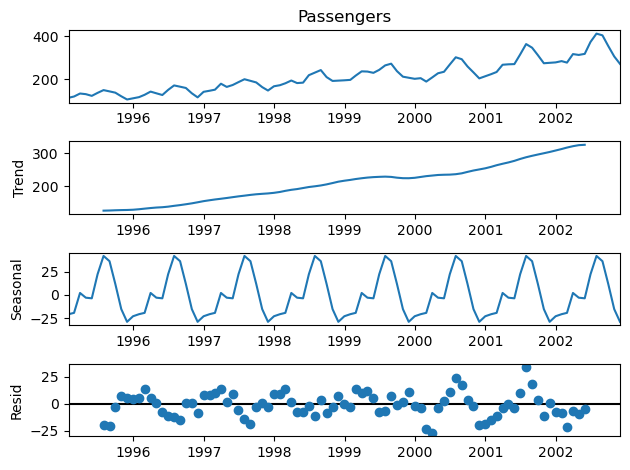

In [163]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(interpolated.Passengers)
decompose_ts_add.plot()
plt.show()

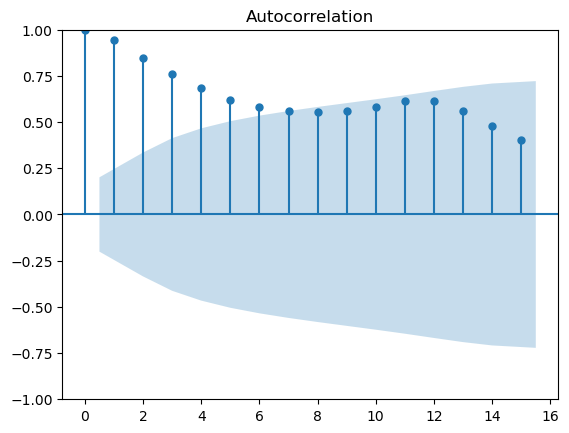

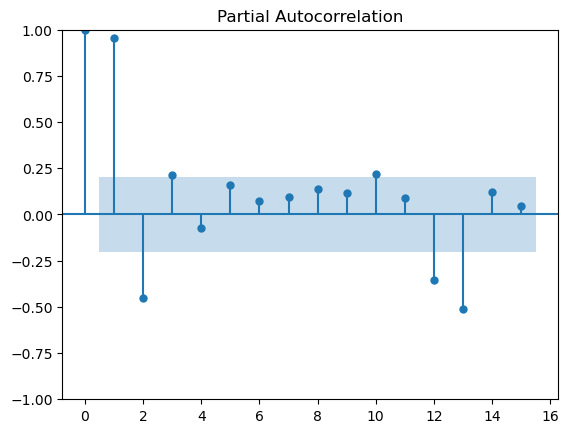

In [164]:
# ACF Plots & PACF Plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(interpolated.Passengers, lags=15)
tsa_plots.plot_pacf(interpolated.Passengers, lags=15)
plt.show()

In [173]:
def MAPE(pred, org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [172]:
# Simple Exponential Methode
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses_model = SimpleExpSmoothing(Train['Passenegrs']).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_ses,Test.Passengers)


KeyError: 'Passenegrs'

In [171]:
Test

,Passengers
Month,
2001-10-31,274.0
2001-11-30,276.0
2001-12-31,278.0
2002-01-31,284.0
2002-02-28,277.0
2002-03-31,317.0
2002-04-30,313.0
2002-05-31,318.0
2002-06-30,374.0
